In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import linear_model


In [20]:
data = pd.read_csv("WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")
data = data.drop(['Customer'], axis=1)

data


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [21]:

# Assuming categorical columns are ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
#                                 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
#                                 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

categorical_columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
                       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
                       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

# Get the numerical columns (excluding 'Customer')
numerical_columns = [col for col in data.columns if col not in categorical_columns and col != 'Customer' and col != "Effective To Date" ]



In [22]:
categorical_columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
                       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
                       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [23]:
for i, col in enumerate(data[['Total Claim Amount', 'Monthly Premium Auto']]):

    print(f"Original skew of {col}", data[col].skew())


Original skew of Total Claim Amount 1.7149658097209557
Original skew of Monthly Premium Auto 2.1235464499475345


In [24]:
numerical_columns

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

C:\Users\samus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation : 0.4718167582845637
Original skew of Total Claim Amount 1.7149658097209557
New skew of Total Claim Amount 0.04691555961883165
Lambda value used for Transformation : -1.4560475713521648
Original skew of Monthly Premium Auto 2.1235464499475345
New skew of Monthly Premium Auto 0.1745891341828821


C:\Users\samus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


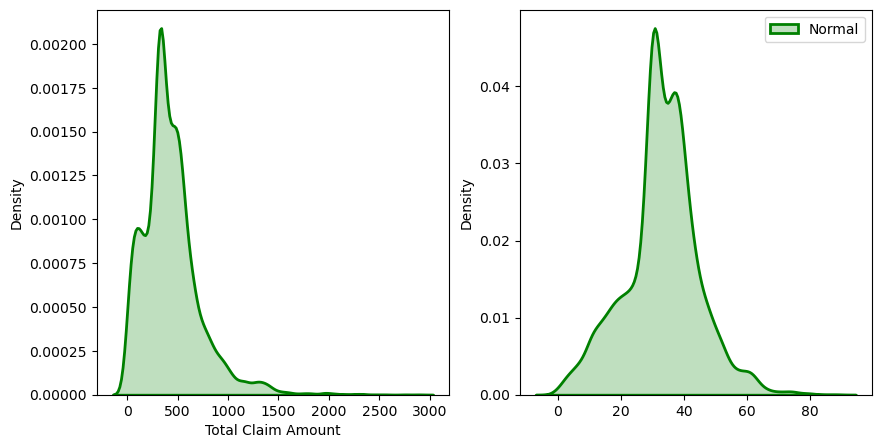

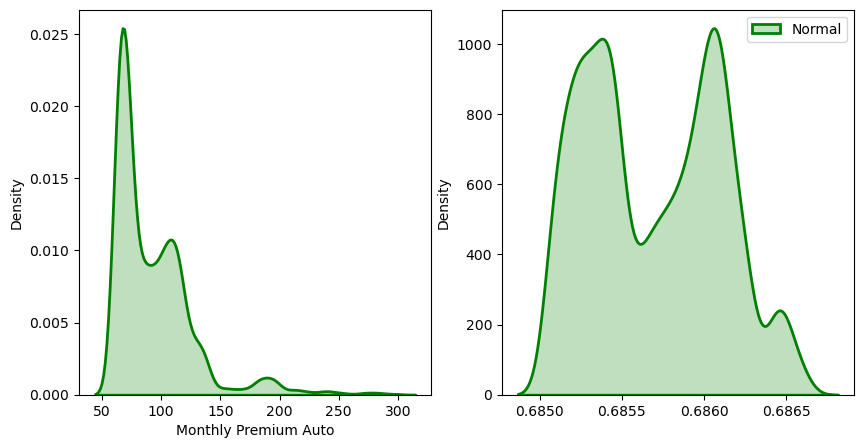

In [25]:
# import modules
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt



for i, col in enumerate(data[['Total Claim Amount', 'Monthly Premium Auto']]):
    

    
    fitted_data, fitted_lambda = stats.boxcox(data[col])
    

    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)
    # plotting the original data(non-normal) and
    # fitted data (normal)
    sns.distplot(data[col], hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Non-Normal", color ="green", ax = ax[0])

    sns.distplot(fitted_data, hist = False, kde = True,
                kde_kws = {'shade': True, 'linewidth': 2},
                label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)


    print(f"Lambda value used for Transformation : {fitted_lambda}")
    print(f"Original skew of {col}", data[col].skew())
    data[col] = fitted_data
    print(f"New skew of {col}", data[col].skew())

    
    


In [26]:
numerical_data = data[numerical_columns]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)
standardized_data

array([[-0.76287773,  0.61282744, -0.85061054, ..., -0.42224956,
        -0.82264788,  0.00602098],
       [-0.14924546, -1.23961684,  0.43357413, ..., -0.42224956,
         2.10615996,  1.98880389],
       [ 0.71063622,  0.36570978,  0.84693644, ..., -0.42224956,
        -0.40424676,  0.60421231],
       ...,
       [ 0.02313483, -1.23961684,  0.07713899, ...,  2.87324529,
        -0.40424676,  1.21565784],
       [-0.06993547, -0.51735647,  0.50175583, ..., -0.42224956,
         0.01415436,  0.95732329],
       [-0.78495478, -1.23961684, -0.32763553, ..., -0.42224956,
        -0.82264788, -0.05031583]])

In [27]:
label_encoder = LabelEncoder()
categorical_cols = [State', 'Response', 'Coverage','Education', 'Effective To Date', 'EmploymentStatus','Gender', 'Marital Status', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


SyntaxError: invalid syntax (1259035317.py, line 2)

In [28]:
label_encoder = LabelEncoder()
categorical_cols = ['State', 'Response', 'Coverage','Education', 'Effective To Date', 'EmploymentStatus','Gender', 'Marital Status', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code',
                    'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    


In [29]:
data

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,47,1,0,56274,1,...,5,0,1,0,2,0,0,33.035752,5,1
1,0,6979.535903,0,1,0,24,4,0,0,1,...,42,0,8,1,5,2,0,56.357614,0,1
2,2,12887.431650,0,2,0,41,1,0,48767,1,...,38,0,2,1,5,0,0,40.071789,5,1
3,1,7645.861827,0,0,0,12,4,1,0,1,...,65,0,7,0,1,0,2,38.763252,3,1
4,4,2813.692575,0,0,0,52,1,1,43836,0,...,44,0,1,1,3,0,0,19.560154,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,23405.987980,0,0,0,32,1,1,71941,2,...,89,0,2,1,3,1,3,23.588905,0,1
9130,1,3096.511217,1,1,1,34,1,0,21604,1,...,28,0,1,0,2,0,1,32.792951,0,1
9131,1,8163.890428,0,1,0,55,4,1,0,1,...,37,3,2,0,1,0,1,47.263726,0,1
9132,1,7524.442436,0,1,1,52,1,1,21941,1,...,3,0,3,1,4,2,1,44.225147,0,0


In [30]:
categorical_data = data[categorical_columns]


encoder = OneHotEncoder()
binarized_data = encoder.fit_transform(categorical_data).toarray()
binarized_data

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [111]:
final_data = pd.DataFrame(np.concatenate((standardized_data, binarized_data), axis=1))
final_data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.762878,0.612827,-0.850611,1.678099,-1.543287,-0.422250,-0.822648,0.006021,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.149245,-1.239617,0.433574,-0.208186,-0.217334,-0.422250,2.106160,1.988804,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.710636,0.365710,0.846936,0.288205,-0.360680,-0.422250,-0.404247,0.604212,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.052263,-1.239617,0.796030,0.288205,0.606907,-0.422250,1.687759,0.492963,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.755575,0.203390,-0.571535,-0.307465,-0.145661,-0.422250,-0.822648,-1.139650,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.571535,0.288205,1.466984,-0.422250,-0.404247,-0.797133,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9130,-0.714411,-0.528450,-0.216971,-0.108908,-0.719046,-0.422250,-0.822648,-0.014621,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9131,0.023135,-1.239617,0.077139,-0.605299,-0.396517,2.873245,-0.404247,1.215658,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9132,-0.069935,-0.517356,0.501756,1.876656,-1.614960,-0.422250,0.014154,0.957323,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [135]:

pca = PCA()
pca.fit(final_data)

PCA()

In [136]:
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)


n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
final_data_pca = pca.fit_transform(final_data)


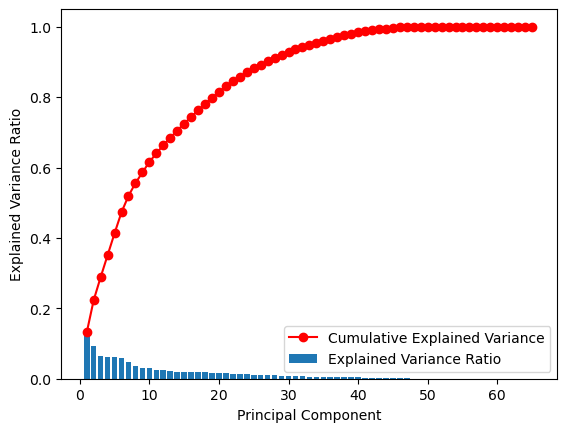

In [137]:
import matplotlib.pyplot as plt


pca_all = PCA()
pca_all.fit(final_data)

explained_variance_ratio = pca_all.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='red', 
         label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


In [139]:
pca = PCA(n_components = 3)

In [140]:
principalComponents = pca.fit_transform(final_data)


In [141]:
pca_results_df = pd.DataFrame(principalComponents)
pca_results_df

,0,1,2
0,-0.959576,-0.398763,1.841472
1,2.272657,-1.167656,0.569138
2,0.904363,1.148017,0.283286
3,1.564838,-0.662551,0.290350
4,-1.535818,-0.446033,-0.403980
...,...,...,...
9129,-1.033398,1.744547,-0.746871
9130,-0.012960,-0.636397,0.089535
9131,1.708269,-1.398515,-0.172682
9132,1.000706,-0.050273,2.353138


In [142]:
finalDf = pd.DataFrame(pca_results_df)
finalDf['Customer Lifetime Value'] = final_data[0]
finalDf


,0,1,2,Customer Lifetime Value
0,-0.959576,-0.398763,1.841472,-0.762878
1,2.272657,-1.167656,0.569138,-0.149245
2,0.904363,1.148017,0.283286,0.710636
3,1.564838,-0.662551,0.290350,-0.052263
4,-1.535818,-0.446033,-0.403980,-0.755575
...,...,...,...,...
9129,-1.033398,1.744547,-0.746871,2.241590
9130,-0.012960,-0.636397,0.089535,-0.714411
9131,1.708269,-1.398515,-0.172682,0.023135
9132,1.000706,-0.050273,2.353138,-0.069935


In [144]:
#features = data.drop(['Customer','Effective To Date','Customer Lifetime Value'], axis=1)
features = finalDf.drop(['Customer Lifetime Value'], axis=1)

target = finalDf['Customer Lifetime Value']


x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


alpha = 0.1  # Regularization strength (a hyperparameter to be tuned)
l1_ratio = 0.5  # Mixing parameter between L1 (Lasso) and L2 (Ridge) regularization

elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
elastic_net.fit(X_train, y_train)


y_pred = elastic_net.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared = False)

#rmse = sqrt(mean_squared_error(y_test, y_pred)) 
rmse = mean_squared_error(y_test, y_pred, squared = False)


print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("RMSE:", rmse)


Mean Squared Error: 0.5517986708108624
R-squared: 0.494574709557441
RMSE: 0.7428315224940729


In [145]:
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def models(model):
    m=model
    m.fit(X_train,y_train)
    train_pred = m.predict(X_train)
    preds = m.predict(X_test)
    residuals=preds-y_test
    
  #  sns.residplot(preds,residuals,lowess=True, color="g")
    print('=======Train======')
    print("score:", rmse(y_train, train_pred))
    print('======Test======')
    print("score:", rmse(y_test,preds))

    return m



=======Train======
score: 0.7100481657917908
======Test======
score: 0.7315216175763223


([0.5030890880537835,
  0.5148366340045719,
  0.5076240878072227,
  0.5095668269395685,
  0.5079602386535723,
  0.5010562586760794,
  0.5003152592041729,
  0.49185076118726256,
  0.4981561744917843,
  0.4934241875616086],
 [0.5058174989130968,
  0.5066939652754271,
  0.5040236086981237,
  0.5067114114830578,
  0.5040846276036021,
  0.5023017976424271,
  0.5015505947529534,
  0.4974122480931476,
  0.49969783958983854,
  0.49701214114888087])

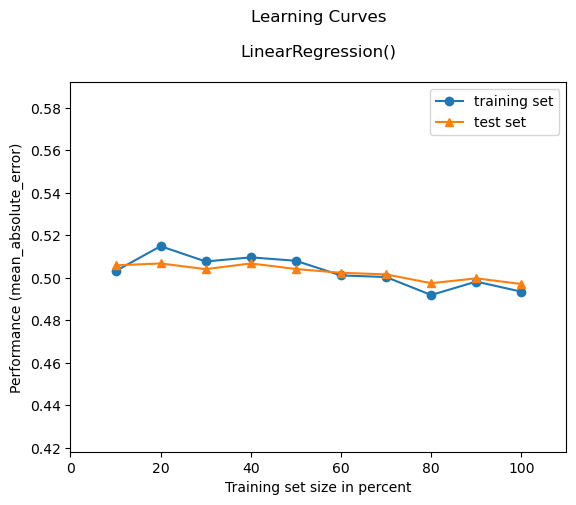

In [99]:
from sklearn.linear_model import LinearRegression
reg = models(LinearRegression())

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, reg, scoring='mean_absolute_error')



In [129]:
# EDA done with bar plot
bar_eda = ['Customer Lifetime Value','Coverage','Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints','Number of Policies',
       'Renew Offer Type','Total Claim Amount', 'Vehicle Class', 'Vehicle Size']

# EDA done with boxplot
box_eda = ["Customer Lifetime Value","EmploymentStatus", "Renew Offer Type", "Vehicle Class",
          "Policy", "Monthly Premium Auto", "Coverage"]

# Need to add target to these since the train test split is done later and
# only the specified variables in the function are clustered

In [130]:
categorical_columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
                       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
                       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [146]:
categorical_data = data[categorical_columns]


encoder = OneHotEncoder()
binarized_data = encoder.fit_transform(categorical_data).toarray()

In [147]:
df = finalDf

In [148]:
def plot_variance(pca,width=8, dpi=100):
  fig, axs = plt.subplots(1,2)
  n = pca.n_components_
  grid = np.arrange(1,n+1)
  evr = pca.explained_variance_ratio_
  axs = [0].bar(grid,evr)
  axs[0].set(
      xlabel_pca = 'Component', title = "Variance", ylim = (0.0,1.0)
  )
# Cummulative Variance
  cv = np.cumsum(evr)
  axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
  axs[1].set(
      xlabel_pca = 'Component', title = "Variance", ylim = (0.0,1.0)
)

# Set up the figure
  fig.set(figwidth=8, dpi=100)
  return axs

In [149]:
def RMSE(y_true,y_pred):
  rmse = mean_squared_error(y_true,y_pred,squared=False)
  return rmse

def tr_score():
  return make_scorer(RMSE)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def formula_and_column(df):

  formula = "Customer_Lifetime_Value ~ "
  is_first = True

  for i in df.drop(['Customer_Lifetime_Value'], axis=1).columns:
    new_string = '_'.join(i.split())
    df = df.rename(columns={i:new_string})
    if is_first:
      formula = formula + new_string
      is_first = False
    else:
      formula = formula + "+" + new_string

  return df, formula

In [160]:
# models: Lasso, Elastic, GLM, Decision Tree, Random Forest, Boosted Tree
def model_tests(df, model_list):

  models = {}

  df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

  train, test = train_test_split(df, test_size=0.2)

  X = test.drop(['Customer_Lifetime_Value'], axis=1)
  y = test['Customer_Lifetime_Value']

  train_x = train.drop(['Customer_Lifetime_Value'], axis=1)
  train_y = train['Customer_Lifetime_Value']

  if "Lasso" in model_list:
    # Lasso
    clf = linear_model.Lasso(alpha=0.1)
    clf.fit(train_x, train_y)

    preds = clf.predict(X)

    print("Lasso Test Score: ", rmse(preds, y))

    models['Lasso'] = clf

  if "Elastic" in model_list:
    # Ridge with elastic net

    e_net = ElasticNet(alpha = 1)
    e_net.fit(train_x, train_y)

    preds = e_net.predict(X)

    print("Elastic Net Test Score: ", rmse(preds, y))

    models["Elastic Net"] = e_net

  if "GLM" in model_list:
    # GLM

    df, formula = formula_and_column(df)
    df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

    train, test = train_test_split(df, test_size=0.2)

    X = test.drop(['Customer_Lifetime_Value'], axis=1)
    y = test['Customer_Lifetime_Value']

    train_x = train.drop(['Customer_Lifetime_Value'], axis=1)
    train_y = train['Customer_Lifetime_Value']

    gamma_model = smf.glm(formula=formula,
                    data=train,
                    family=sm.families.InverseGaussian(link=sm.families.links.log())).fit()

    # now generate predictions
    ypred = gamma_model.predict(X)

    # calc rmse
    r = rmse(y, ypred)

    # now generate predictions
    ytrainpred = gamma_model.predict(train_x)

    # calc rmse
    r_train = rmse(train_y, ytrainpred)

    print("GLM Train and Test")
    display(r_train)
    display(r)

    # summary can be gotten from model in returned dictionary
    print(gamma_model.summary())

    models['GLM'] = gamma_model

  if "Decision Tree" in model_list:
    # Decision Tree

    grid_vals = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13],
             'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,13,14]}
    model = DecisionTreeRegressor()

    grid_dt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_dt.fit(train_x, train_y)
    preds = grid_dt.best_estimator_.predict(X)

    print("DT Training Score: ", grid_dt.best_score_)
    print("DT Test Score: ", rmse(preds, y))
    print("DT best params: ", grid_dt.best_params_)

    models['Decision Tree'] = grid_dt

  if "Random Forest" in model_list:
    # Random Forest

    grid_vals = {'n_estimators':[100],
             'max_depth':[6,7,8,9],
             'max_leaf_nodes':[4,5,6,7,8,9],
             'max_features':["log2"]}
    model = RandomForestRegressor()

    grid_rt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_rt.fit(train_x, train_y)
    preds = grid_rt.best_estimator_.predict(X)

    rmse(preds, y)

    print("RT Training Score: ", grid_rt.best_score_)
    print("RT Test Score: ", rmse(preds, y))
    print("RT best params: ", grid_rt.best_params_)

    models["Random Forest"] = grid_rt

  if "Boosted Tree" in model_list:
    # Boosted Tree

    grid_vals = {'n_estimators':[100],
             'learning_rate':[0.05],
             'max_depth':[6,7,8,9],
             'max_leaf_nodes':[4,5,6,7,8,9],
             'max_features':["log2"]}
    model = GradientBoostingRegressor()

    grid_bt = GridSearchCV(estimator=model, param_grid=grid_vals,
                       cv=10,scoring=tr_score())

    grid_bt.fit(train_x, train_y)
    preds = grid_bt.best_estimator_.predict(X)


    print("BT Training Score: ", grid_bt.best_score_)
    print("BT Test Score: ", rmse(preds, y))
    print("BT best params: ", grid_bt.best_params_)

    models['Boosted Tree'] = grid_bt

  return models



In [161]:
all_models = ["GLM"]

In [162]:
bar_df = data[bar_eda]
no_cluster_bar_models = model_tests(bar_df, all_models)

GLM Train and Test


6417.861133326704

5983.62061163992

                    Generalized Linear Model Regression Results                    
Dep. Variable:     Customer_Lifetime_Value   No. Observations:                 7307
Model:                                 GLM   Df Residuals:                     7295
Model Family:              InverseGaussian   Df Model:                           11
Link Function:                         log   Scale:                      8.1968e-05
Method:                               IRLS   Log-Likelihood:                -70699.
Date:                     Tue, 01 Aug 2023   Deviance:                      0.40393
Time:                             23:09:46   Pearson chi2:                    0.598
No. Iterations:                         34   Pseudo R-squ. (CS):             0.1384
Covariance Type:                 nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [163]:
all_models = ["Random Forest"]

In [164]:
bar_df = data[bar_eda]
no_cluster_bar_models = model_tests(bar_df, all_models)

RT Training Score:  5403.020319350089
RT Test Score:  5382.900766739192
RT best params:  {'max_depth': 8, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


In [165]:
all_models = ["Lasso", "Elastic", "Decision Tree", "Boosted Tree"]

In [169]:
bar_df = data[bar_eda]
no_cluster_bar_models = model_tests(bar_df, all_models)

Lasso Test Score:  6487.590097689349
Elastic Net Test Score:  6786.951620220719
DT Training Score:  4861.736574446461
DT Test Score:  5238.179702084707
DT best params:  {'max_depth': 2, 'max_leaf_nodes': 7}
BT Training Score:  4185.81272220949
BT Test Score:  4156.93354848162
BT best params:  {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 100}


In [ ]:
df = df.rename(columns={'Customer Lifetime Value': 'Customer_Lifetime_Value'})

#pca_x_train, pca_test_x , pca_y_train, pca_y_test

train_x = df.drop(['Customer_Lifetime_Value'], axis=1)
val_x  =  pca2_results_df
train_y = np.array(df['Customer_Lifetime_Value'])
val_y = np.array(pca_y_test)


In [ ]:
import pandas as pd


data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


correlation_matrix = data.corr()


correlation_with_customer_value = correlation_matrix['Customer Lifetime Value'].sort_values(ascending=False)


print("Top factors contributing to customer value:")
print(correlation_with_customer_value)


In [ ]:

demographic_characteristics = ['State', 'Education', 'EmploymentStatus', 'Gender', 'Marital Status', 'Vehicle Class', 'Vehicle Size']
average_customer_value_by_demographic = data.groupby(demographic_characteristics)['Customer Lifetime Value'].mean()


highest_customer_value_demographic = average_customer_value_by_demographic.idxmax()
highest_customer_value = average_customer_value_by_demographic.max()

print("Demographic characteristics with the highest customer value:")
print(highest_customer_value_demographic)
print("Average Customer Lifetime Value for this demographic:")
print(highest_customer_value)


In [ ]:

high_value_percentile = 0.90
low_value_percentile = 0.10


high_value_threshold = data['Customer Lifetime Value'].quantile(high_value_percentile)
low_value_threshold = data['Customer Lifetime Value'].quantile(low_value_percentile)


high_value_customers = data[data['Customer Lifetime Value'] >= high_value_threshold]
low_value_customers = data[data['Customer Lifetime Value'] <= low_value_threshold]



high_value_response_rate = high_value_customers['Response'].value_counts(normalize=True)
low_value_response_rate = low_value_customers['Response'].value_counts(normalize=True)

print("Response rate for high-value customers:")
print(high_value_response_rate)

print("Response rate for low-value customers:")
print(low_value_response_rate)


## Based on lifetime customer value, could we determine the total claim amount applied to each customer group?

In [ ]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


low_value_threshold = data['Customer Lifetime Value'].quantile(0.25)
medium_value_threshold = data['Customer Lifetime Value'].quantile(0.5)
high_value_threshold = data['Customer Lifetime Value'].quantile(0.75)

def categorize_customer_group(lifetime_value):
    if lifetime_value <= low_value_threshold:
        return 'Low-Value Customers'
    elif lifetime_value <= medium_value_threshold:
        return 'Medium-Value Customers'
    elif lifetime_value <= high_value_threshold:
        return 'High-Value Customers'
    else:
        return 'Very High-Value Customers'


data['Customer Group'] = data['Customer Lifetime Value'].apply(categorize_customer_group)


total_claim_amount_by_group = data.groupby('Customer Group')['Total Claim Amount'].sum()

total_claim_amount_by_group = total_claim_amount_by_group.round(2)


print("Total claim amount applied to each customer group:")
print(total_claim_amount_by_group)


## Which Sales channels are the most effective for targeting customers with high-value?

In [ ]:
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


high_value_threshold = data['Customer Lifetime Value'].quantile(0.75)

data['High-Value Customer'] = data['Customer Lifetime Value'] >= high_value_threshold


data['Response'] = data['Response'].map({'Yes': 1, 'No': 0})


high_value_response_rate_by_channel = data[data['High-Value Customer']].groupby('Sales Channel')['Response'].mean()


high_value_response_rate_by_channel = high_value_response_rate_by_channel.sort_values(ascending=False)


print("Response rates for each sales channel among high-value customers:")
print(high_value_response_rate_by_channel)


## Would marketing campaigns influence customers based on vehicle class and size?

In [ ]:
import pandas as pd


data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


data['Response'] = data['Response'].map({'Yes': 1, 'No': 0})


response_rates_by_campaign_class_size = data.groupby(['Renew Offer Type', 'Vehicle Class', 'Vehicle Size'])['Response'].mean()


print("Response rates for each marketing campaign based on vehicle class and size:")
print(response_rates_by_campaign_class_size)


In [ ]:
import pandas as pd


data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')


data['Responded_to_Campaign'] = data['Response'].map({'Yes': 1, 'No': 0})


response_rates_by_vehicle_class = data.groupby(['Vehicle Class'])['Responded_to_Campaign'].mean()


response_rates_by_vehicle_size = data.groupby(['Vehicle Size'])['Responded_to_Campaign'].mean()


print("Response rates by Vehicle Class:")
print(response_rates_by_vehicle_class)

print("\nResponse rates by Vehicle Size:")
print(response_rates_by_vehicle_size)